# Linear regression: Housing Price Prediction

This notebook uses the classic [Boston Housing](http://lib.stat.cmu.edu/datasets/boston) Dataset and builds a model to predict the housing price in the suburban area of Boston.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
import time


## The Boston Housing Dataset

The Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The dataset is small in size with only 506 cases. A full description of all variables can be found [here](http://lib.stat.cmu.edu/datasets/boston).

### Get the data
First download the dataset. Boston dataset is a build-in dataset in Keras. Notice that this build-in dataset has already been cleaned and preprocessed (normalized) by keras.

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
print('Training data : {}'.format(train_data.shape))
print('Test data : {}'.format(test_data.shape))

Training data : (404, 13)
Test data : (102, 13)


## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [4]:
def build_model():
    model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mse'])
    
    return model

In [5]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Train the model

Train the model for 2000 epochs, and record the training accuracy in the `history` object.

In [7]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
            
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))

EPOCHS = 2000

# use validation_split argument to do train-validation split
history = model.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])

| Epoch    0 | training time   0.23s | train loss 17001.19 |
| Epoch  100 | training time   0.75s | train loss  57.06 |
| Epoch  200 | training time   1.23s | train loss  47.13 |
| Epoch  300 | training time   1.71s | train loss  40.03 |
| Epoch  400 | training time   2.19s | train loss  36.72 |
| Epoch  500 | training time   2.65s | train loss  34.73 |
| Epoch  600 | training time   3.11s | train loss  32.55 |
| Epoch  700 | training time   3.56s | train loss  30.83 |
| Epoch  800 | training time   4.01s | train loss  29.69 |
| Epoch  900 | training time   4.46s | train loss  28.48 |
| Epoch 1000 | training time   4.91s | train loss  28.09 |
| Epoch 1100 | training time   5.36s | train loss  27.16 |
| Epoch 1200 | training time   5.81s | train loss  26.96 |
| Epoch 1300 | training time   6.27s | train loss  26.42 |
| Epoch 1400 | training time   6.72s | train loss  26.63 |
| Epoch 1500 | training time   7.17s | train loss  26.09 |
| Epoch 1600 | training time   7.62s | train loss  25.

Visualize the model's training progress using the stats stored in the `history` object.

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,epoch
1995,25.297216,25.297216,1995
1996,25.390179,25.390179,1996
1997,25.764791,25.764791,1997
1998,24.885904,24.885904,1998
1999,25.325947,25.325947,1999


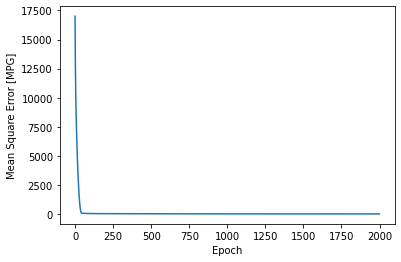

In [11]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')

    plt.show()

plot_history(history)

### Make predictions

Calculate testing test mean squared error

In [12]:
_, mse = model.evaluate(test_data, test_targets, verbose=0)

print("Testing set Mean Squared Error: {:5.2f}".format(mse))

Testing set Mean Squared Error: 25.11


Finally, predict housing price using data in the testing set:

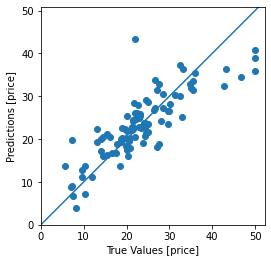

In [13]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
